# 教師あり学習（サポートベクトルマシン）
* 本実習では、教師あり学習のうち、サポートベクトルマシン（SVM: Support Vector Machine）を使います。
   * 機械学習とは→ [コンピューターに"学習"させる](http://image.slidesharecdn.com/deepvision-141031063609-conversion-gate01/95/deep-learning-4-638.jpg) 
   * [サポートベクターマシン](http://image.slidesharecdn.com/shen2007-120927221259-phpapp01/95/proteinprotein-interaction-prediction-8-728.jpg) ・ [サポートベクターマシンとは](http://qiita.com/pesuchin/items/c55f40b69aa1aec2bd19)

In [1]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [3]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [4]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

<a href="http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E5%AE%9F%E7%BF%92%E7%94%A8%E3%83%86%E3%82%99%E3%83%BC%E3%82%BF2017.ipynb">「スイス銀行紙幣データ」</a>を例に説明します。これは、本物のスイス紙幣の紙幣（真札）と偽札の横幅長などの測定値のデータです。果たして、真札と偽札とを機械学習で区別できるでしょうか？

In [5]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sbnote_dataJt.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'sbnote_dataJt.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'sbnote_dataJt.txt') # Python 3 の場合

('sbnote_dataJt.txt', <http.client.HTTPMessage at 0x1098f40f0>)

In [63]:
df = pd.read_csv('sbnote_dataJt.txt', sep='\t', index_col=0) # データの読み込み

In [64]:
df

,length,left,right,bottom,top,diagonal,class
Note,,,,,,,
1,214.8,131.0,131.1,9.0,9.7,141.0,0
2,214.6,129.7,129.7,8.1,9.5,141.7,0
3,214.8,129.7,129.7,8.7,9.6,142.2,0
4,214.8,129.7,129.6,7.5,10.4,142.0,0
5,215.0,129.6,129.7,10.4,7.7,141.8,0
6,215.7,130.8,130.5,9.0,10.1,141.4,0
7,215.5,129.5,129.7,7.9,9.6,141.6,0
8,214.5,129.6,129.2,7.2,10.7,141.7,0
9,214.9,129.4,129.7,8.2,11.0,141.9,0


"class" が札の真偽を表します(0: 真札, 1:偽札)

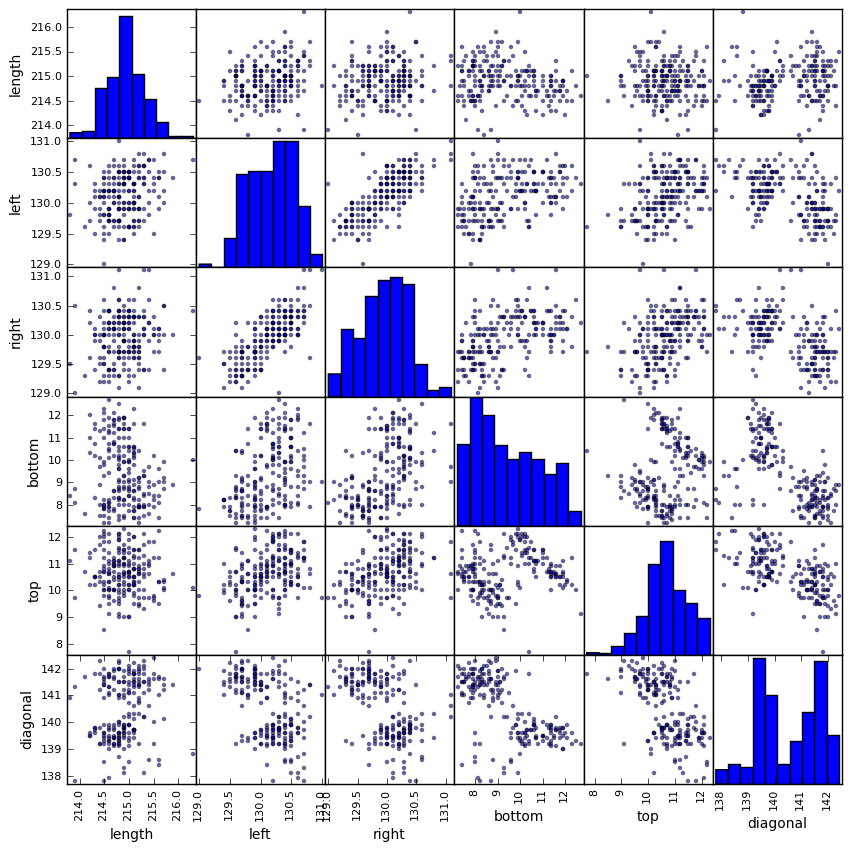

In [65]:
# 散布図行列
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(10, 10)) 
plt.show()

カラーコードを用いて、"class"に基づいて散布図行列を色分けできます。
* カラーコードが分からない人は右記リンク参照→ [カラーコード表](http://www5.plala.or.jp/vaio0630/hp/c_code.htm)・[カラーコード](http://www.finitojapan.com/cltable.html)

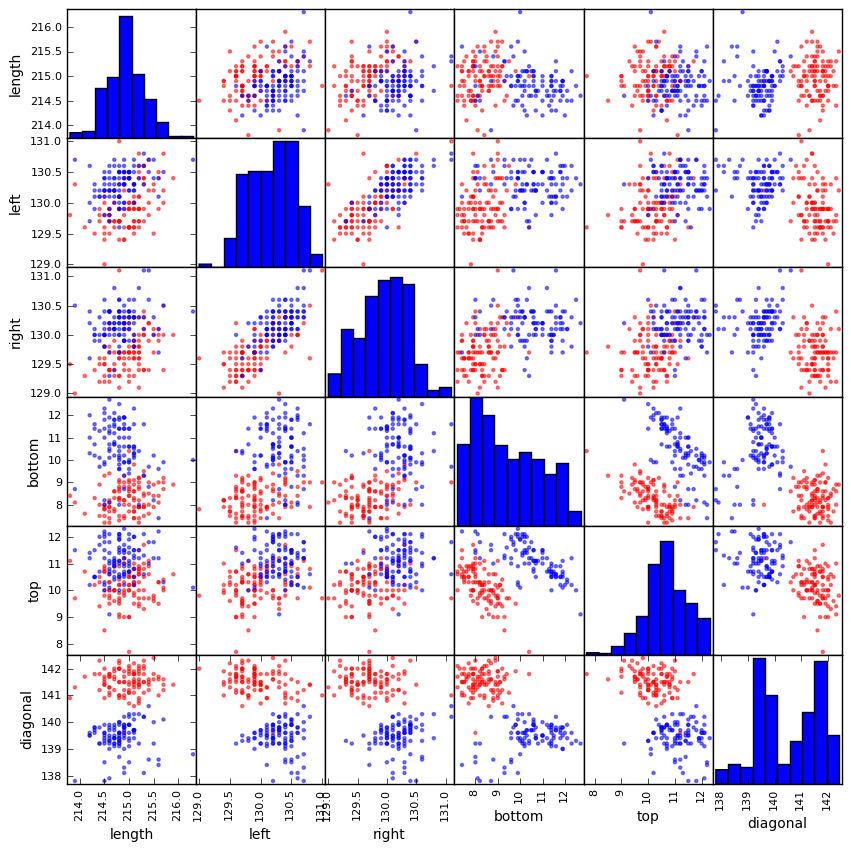

In [66]:
# 色分けした散布図行列
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
plotting.scatter_matrix(df[list(df.columns[:6])], figsize=(10, 10), color=colors) 
plt.show()

上の散布図行列から、真札と偽札の間には、それぞれ違った特徴がありそうだと分かります。

In [67]:
# 行列の正規化
dfs = df.iloc[:, :-1].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

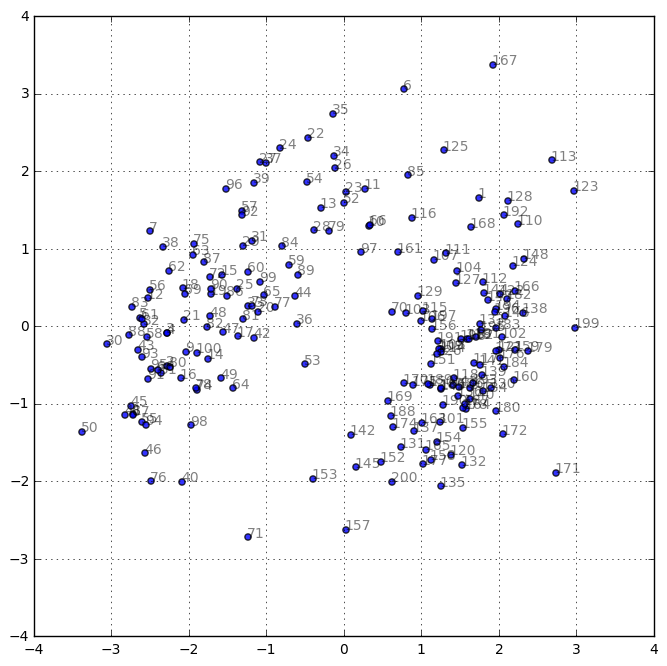

In [68]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

上の主成分分析の結果を見ても、大きく２群に分かれることがわかりました。真札と偽札で色分けをしたらどうなるでしょうか？

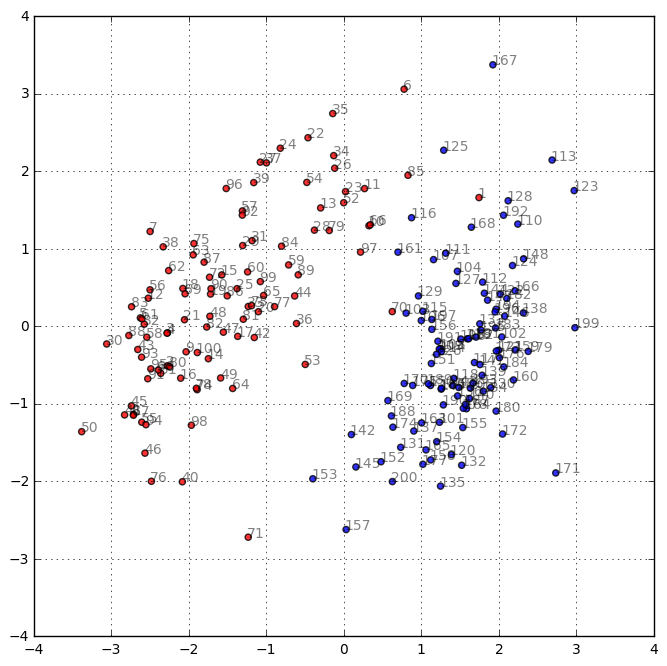

In [69]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=colors)
plt.grid()
plt.show()

これまでの解析で、真札と偽札にははっきりとした特徴の違いがあることが分かりました。では次に、これを自動的に区別するための機械学習モデルを作りましょう。

### データの整形
Nをサンプル数、Mを特徴量の数とする。__data__から__target__を予測する問題を解く。
* __feature_names__ : 特徴量の名前（M次元のベクトル）
* __target_names__ : 目的変数の名前
* __sample_names__ : サンプルの名前（N次元のベクトル）
* __data__ : 説明変数（N行M列の行列）
* __target__ : 目的変数（N次元のベクトル）

In [70]:
feature_names = df.columns[:-1]
target_names = list(set(df.iloc[:, -1]))
sample_names = df.index
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

### データの分割
交差検定をするため、データを学習用とテスト用に分割します。
* __train_data__ :  説明変数（学習用）
* __test_data__ : 説明変数（テスト用）
* __train_target__ : 目的変数（学習用）
* __test_target__ :  目的変数（テスト用）

交差検定 (cross-validation) とは → [交差検定](http://image.slidesharecdn.com/scikit-learn-141201042924-conversion-gate01/95/scikit-learn-15-638.jpg)
* 現在取得できているデータを「学習用」と「テスト用」に分け、「学習用」だけを使って予測モデルを構築し、「評価用」を使ってモデルの性能を評価する。

In [71]:
from sklearn import cross_validation as cv
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.5)

In [87]:
train_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
54,5.5,2.3,4.0,1.3
127,6.2,2.8,4.8,1.8
66,6.7,3.1,4.4,1.4
70,5.6,2.5,3.9,1.1
44,5.0,3.5,1.6,0.6
21,5.4,3.4,1.7,0.2
122,5.6,2.8,4.9,2.0
91,5.5,2.6,4.4,1.2
80,5.7,2.6,3.5,1.0
121,6.9,3.2,5.7,2.3


### SVMで学習・予測
学習用データ（ __train_data__ と __train_target__ ) の関係を学習して、テスト用データ( __test_data__ )から正解( __test_target__ ) を予測する、という流れになります。

In [72]:
# 様々なパラメータ（ハイパーパラメータという）で学習し、分離性能の最も良いモデルを選択する。
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

In [73]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search

# train_data を使って、SVM による学習を行う
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)

# 分離性能の最も良かったモデルが何だったか出力する
print(gs.best_estimator_)

# モデル構築に使わなかったデータを用いて、予測性能を評価する
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_score:0.99
elapsed_time:0.5719201564788818


Accuracy score （正解率）が非常に高いことが分かります。この問題は、SVMで解くには簡単すぎるようです。

In [74]:
# 予測結果と、本当の答えを比較する
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target # 本当の答え
df['pred'] = pred_target # 予測された答え
df.T

Note,20,149,113,54,90,99,183,100,62,105,...,118,161,128,16,67,68,166,117,63,169
test,0,1,1,0,0,0,1,0,0,1,...,1,1,1,0,0,0,1,1,0,1
pred,0,1,1,0,0,0,1,0,0,1,...,1,1,1,0,0,0,1,1,0,1


In [75]:
# 予測結果を本当の答えの比較を、混合行列（confusion matrix）で表現する
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, pred_target)
pd.DataFrame(cm)

,0,1
0,54,1
1,0,45


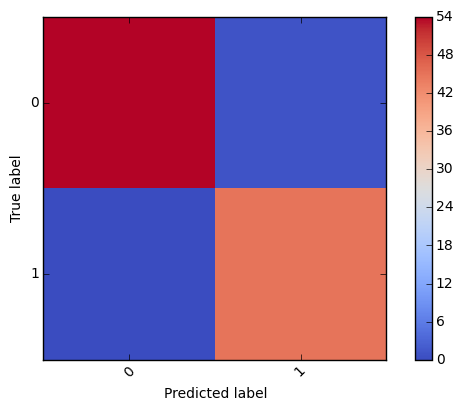

In [76]:
# 混合行列（confusion matrix）をカラーマップで見やすくする
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

続いて、<a href="http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E5%AE%9F%E7%BF%92%E7%94%A8%E3%83%86%E3%82%99%E3%83%BC%E3%82%BF2017.ipynb">「あやめのデータ」</a>を例に説明します。これは、３種類のあやめの測定値のデータです。果たして、これらの測定値から３種類のあやめを区別できるでしょうか？

以下の計算は、扱うデータこそ違いますが、ほとんど同じ操作で行っています。

In [25]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'iris.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'iris.txt') # Python 3 の場合

('iris.txt', <http.client.HTTPMessage at 0x10c760f98>)

In [77]:
df = pd.read_csv('iris.txt', sep='\t', index_col=0) # データの読み込み

In [78]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


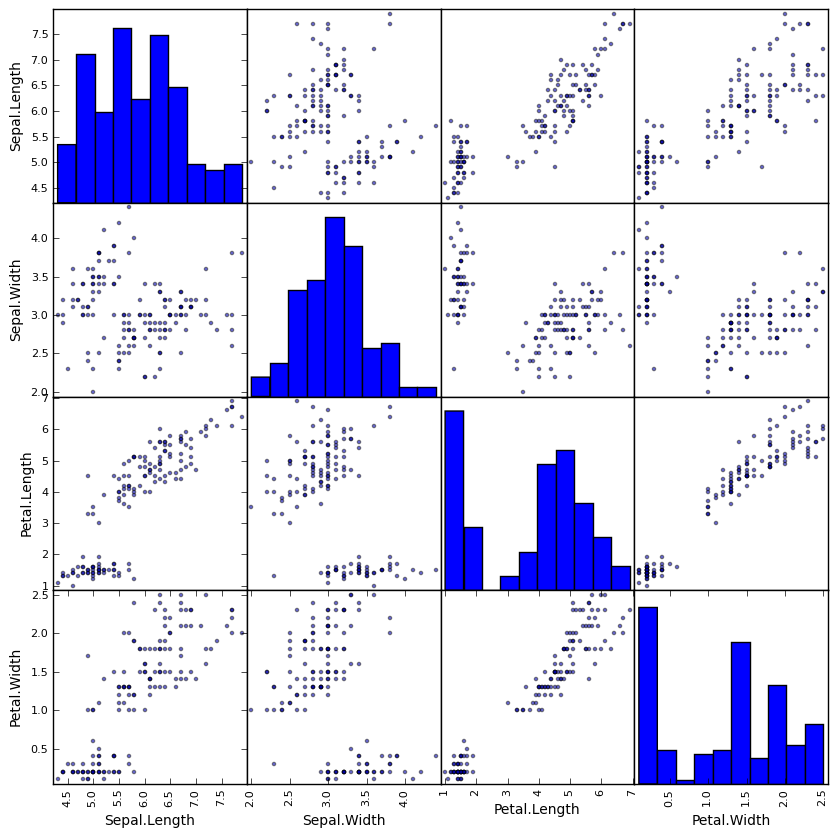

In [80]:
# 散布図行列
plotting.scatter_matrix(df[list(df.columns[:-1])], figsize=(10, 10)) 
plt.show()

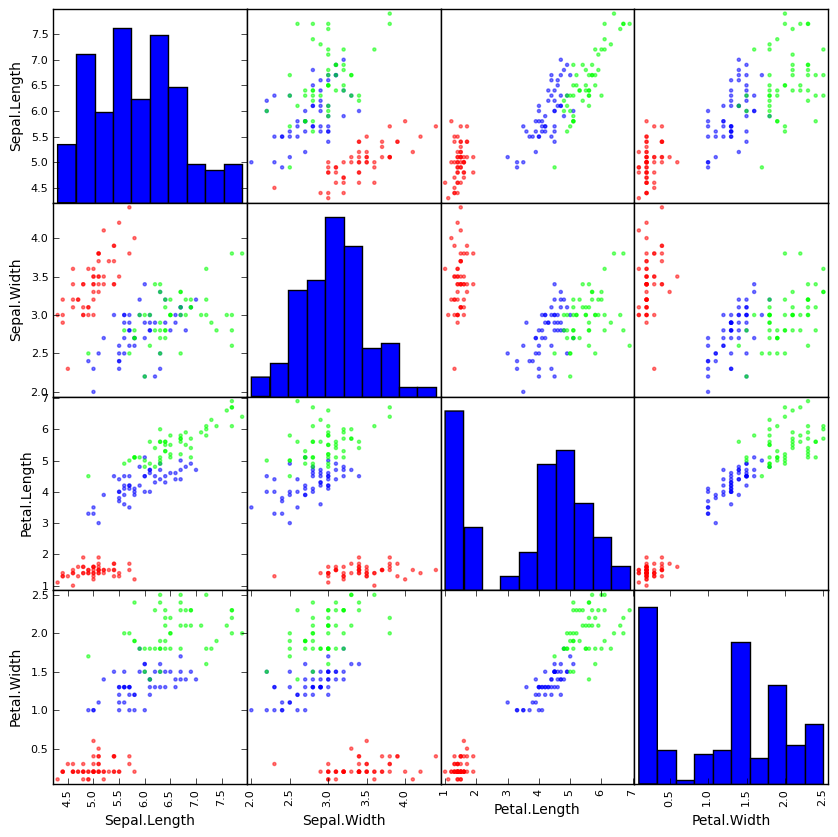

In [81]:
# 散布図行列
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
plotting.scatter_matrix(df[list(df.columns[:6])], figsize=(10, 10), color=colors) 
plt.show()

In [82]:
# データの正規化
dfs = df.iloc[:, :-1].apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

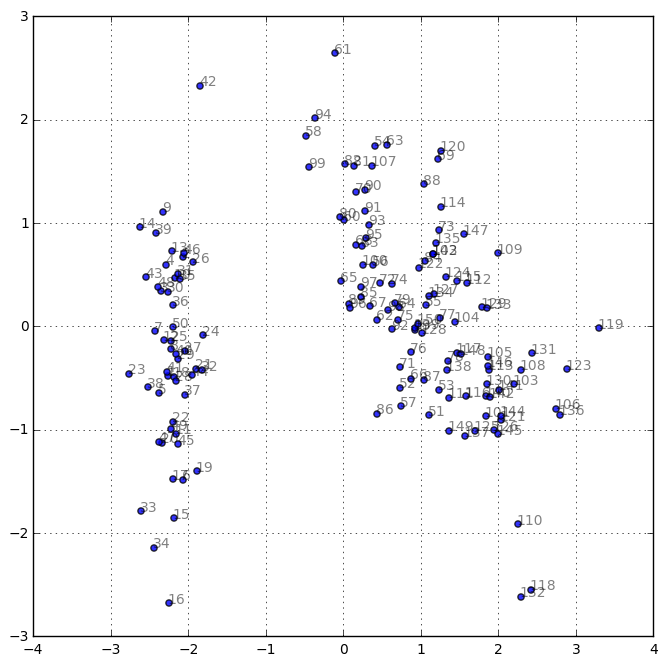

In [83]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

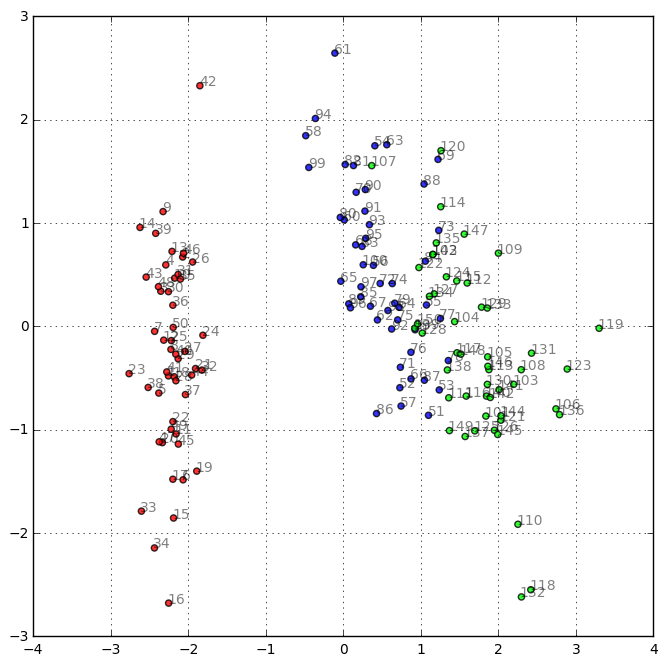

In [84]:
color_codes = ["#FF0000", "#0000FF", "#00FF00"]
class_names = list(set(df.iloc[:, -1]))
colors = [color_codes[class_names.index(x)] for x in list(df.iloc[:, -1])]
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=colors)
plt.grid()
plt.show()

### データの整形
Nをサンプル数、Mを特徴量の数とする。__data__から__target__を予測する問題を解く。
* __feature_names__ : 特徴量の名前（M次元のベクトル）
* __target_names__ : 目的変数の名前
* __sample_names__ : サンプルの名前（N次元のベクトル）
* __data__ : 説明変数（N行M列の行列）
* __target__ : 目的変数（N次元のベクトル）

In [85]:
feature_names = df.columns[:-1]
target_names = list(set(df.iloc[:, -1]))
sample_names = df.index
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

### データの分割
交差検定をするため、データを学習用とテスト用に分割します。
* __train_data__ :  説明変数（学習用）
* __test_data__ : 説明変数（テスト用）
* __train_target__ : 目的変数（学習用）
* __test_target__ :  目的変数（テスト用）

交差検定 (cross-validation) とは → [交差検定](http://image.slidesharecdn.com/scikit-learn-141201042924-conversion-gate01/95/scikit-learn-15-638.jpg)
* 現在取得できているデータを「学習用」と「テスト用」に分け、「学習用」だけを使って予測モデルを構築し、「評価用」を使ってモデルの性能を評価する。

In [86]:
from sklearn import cross_validation as cv
train_data, test_data, train_target, test_target = cv.train_test_split(data, target, test_size=0.5)

In [39]:
train_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
112,6.4,2.7,5.3,1.9
127,6.2,2.8,4.8,1.8
15,5.8,4.0,1.2,0.2
8,5.0,3.4,1.5,0.2
70,5.6,2.5,3.9,1.1
13,4.8,3.0,1.4,0.1
145,6.7,3.3,5.7,2.5
84,6.0,2.7,5.1,1.6
59,6.6,2.9,4.6,1.3
67,5.6,3.0,4.5,1.5


### SVMで学習・予測
学習用データ（ __train_data__ と __train_target__ ) の関係を学習して、テスト用データ( __test_data__ )から正解( __test_target__ ) を予測する、という流れになります。

In [88]:
parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'],     'C': [1, 10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]},      
    {'kernel': ['poly'],'C': [1, 10, 100, 1000], 'degree': [2, 3, 4, 5]}]

In [89]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import time
start = time.time()
from sklearn import grid_search
gs = grid_search.GridSearchCV(svm.SVC(), parameters, n_jobs=2).fit(train_data, train_target)
print(gs.best_estimator_)
pred_target = gs.predict(test_data)
print ("Accuracy_score:{0}".format(accuracy_score(test_target, pred_target)))
elapsed_time = time.time() - start
print("elapsed_time:{0}".format(elapsed_time))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
Accuracy_score:0.9733333333333334
elapsed_time:0.5098891258239746


In [92]:
df = pd.DataFrame(columns=['test', 'pred'])
df['test'] = test_target
df['pred'] = pred_target
df.T

,85,79,35,108,65,142,41,112,13,106,...,119,97,32,42,139,23,51,134,124,76
test,versicolor,versicolor,setosa,virginica,versicolor,virginica,setosa,virginica,setosa,virginica,...,virginica,versicolor,setosa,setosa,virginica,setosa,versicolor,virginica,virginica,versicolor
pred,versicolor,versicolor,setosa,virginica,versicolor,virginica,setosa,virginica,setosa,virginica,...,virginica,versicolor,setosa,setosa,virginica,setosa,versicolor,virginica,virginica,versicolor


In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, pred_target)
pd.DataFrame(cm)

,0,1,2
0,22,0,0
1,0,25,2
2,0,0,26


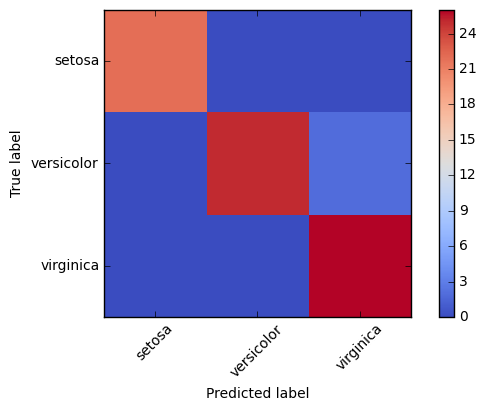

In [96]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

setosa とそれ以外は簡単に区別できますが、versicolorとvirginicaの区別は、たまに間違えることもあるようですね。